<a href="https://colab.research.google.com/github/mohdaffamyhonest-max/Prediksi-Penyakit-Diabetel-Machine-Learning/blob/main/UAS_Data_Mining_Mohammad_Daffa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
from google.colab import drive
drive.mount('/content/drive')

# Update the file path below with your actual file path in Google Drive
file_path = '/content/drive/MyDrive/Dataset Diabetes/diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


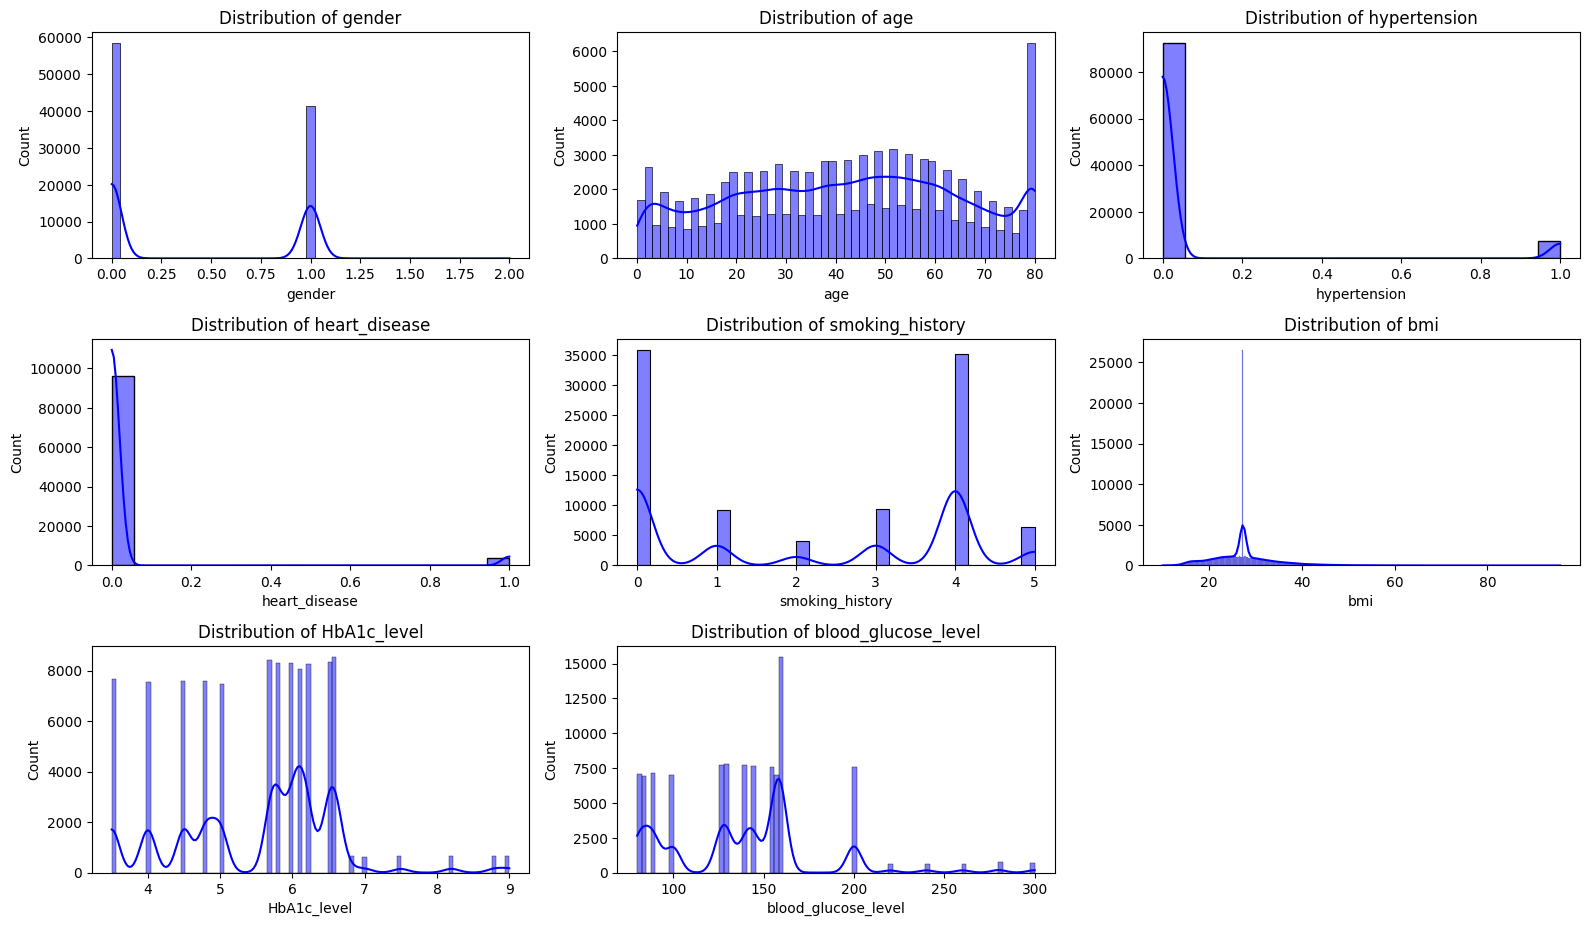

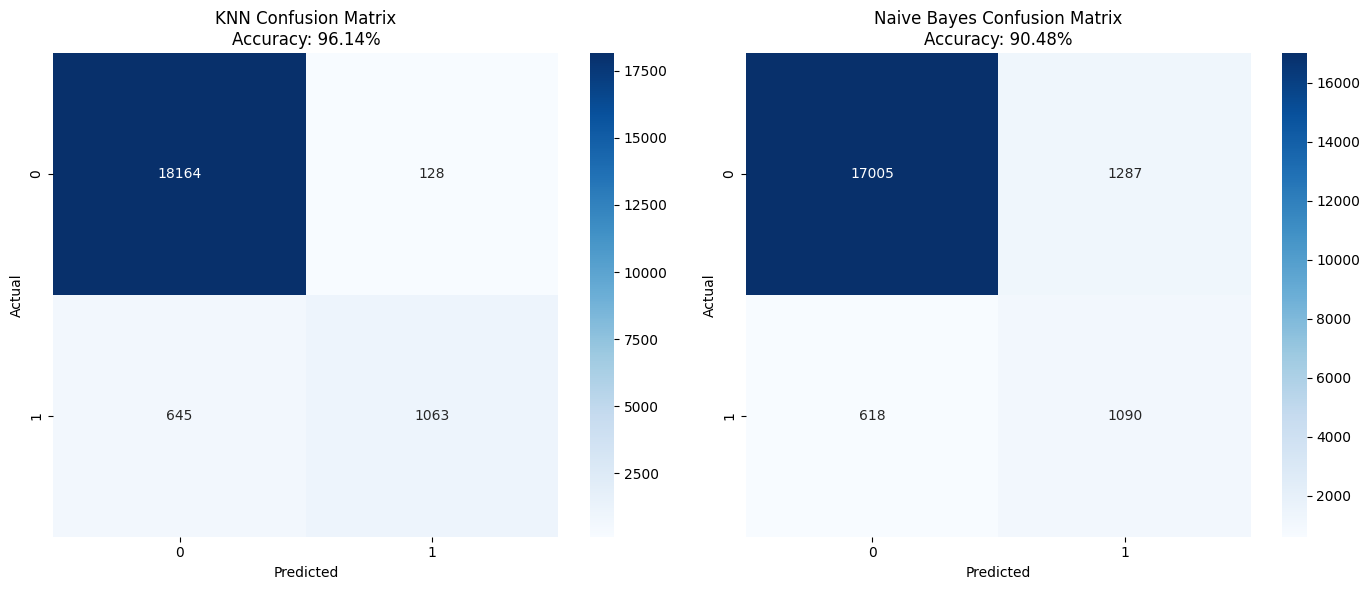

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.89      0.62      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     18292
           1       0.46      0.64      0.53      1708

    accuracy                           0.90     20000
   macro avg       0.71      0.78      0.74     20000
weighted avg       0.92      0.90      0.91     20000



In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Handle missing values
df.fillna(df.median(), inplace=True)

# Plot histograms and curved distributions for each feature
import numpy as np
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns[:-1]):  # Exclude the target column
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Split dataset into features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # Default K=5
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluate Models
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)*100
accuracy_nb = accuracy_score(y_test, y_pred_nb)*100

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'KNN Confusion Matrix\nAccuracy: {accuracy_knn:.2f}%')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(f'Naive Bayes Confusion Matrix\nAccuracy: {accuracy_nb:.2f}%')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print classification reports
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
